In [1]:
# Libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
Base_Dados = pd.read_excel('BaseDados_RegressaoLogistica.xlsx', 'Plan1')

Base_Dados.head()

,Id Cliente,Renda,Tipo Renda,Possui Imóvel,Comprou?
0,1,10480,1,2,1
1,2,6182,2,2,1
2,3,6387,3,1,0
3,4,6528,1,2,0
4,5,8269,1,2,0


In [4]:
Base_Dados.tail()

,Id Cliente,Renda,Tipo Renda,Possui Imóvel,Comprou?
95,96,3238,1,2,0
96,97,10701,1,2,1
97,98,14732,1,2,0
98,99,4790,1,2,1
99,100,14026,2,2,1


In [6]:
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id Cliente     100 non-null    int64
 1   Renda          100 non-null    int64
 2   Tipo Renda     100 non-null    int64
 3   Possui Imóvel  100 non-null    int64
 4   Comprou?       100 non-null    int64
dtypes: int64(5)
memory usage: 4.0 KB


In [5]:
Base_Dados.describe()

,Id Cliente,Renda,Tipo Renda,Possui Imóvel,Comprou?
count,100.000000,100.00000,100.000000,100.00000,100.000000
mean,50.500000,8520.77000,1.400000,1.85000,0.640000
std,29.011492,4039.01965,0.710669,0.35887,0.482418
min,1.000000,1643.00000,1.000000,1.00000,0.000000
25%,25.750000,5455.25000,1.000000,2.00000,0.000000
50%,50.500000,8824.00000,1.000000,2.00000,1.000000
75%,75.250000,12036.00000,2.000000,2.00000,1.000000
max,100.000000,14994.00000,3.000000,2.00000,1.000000


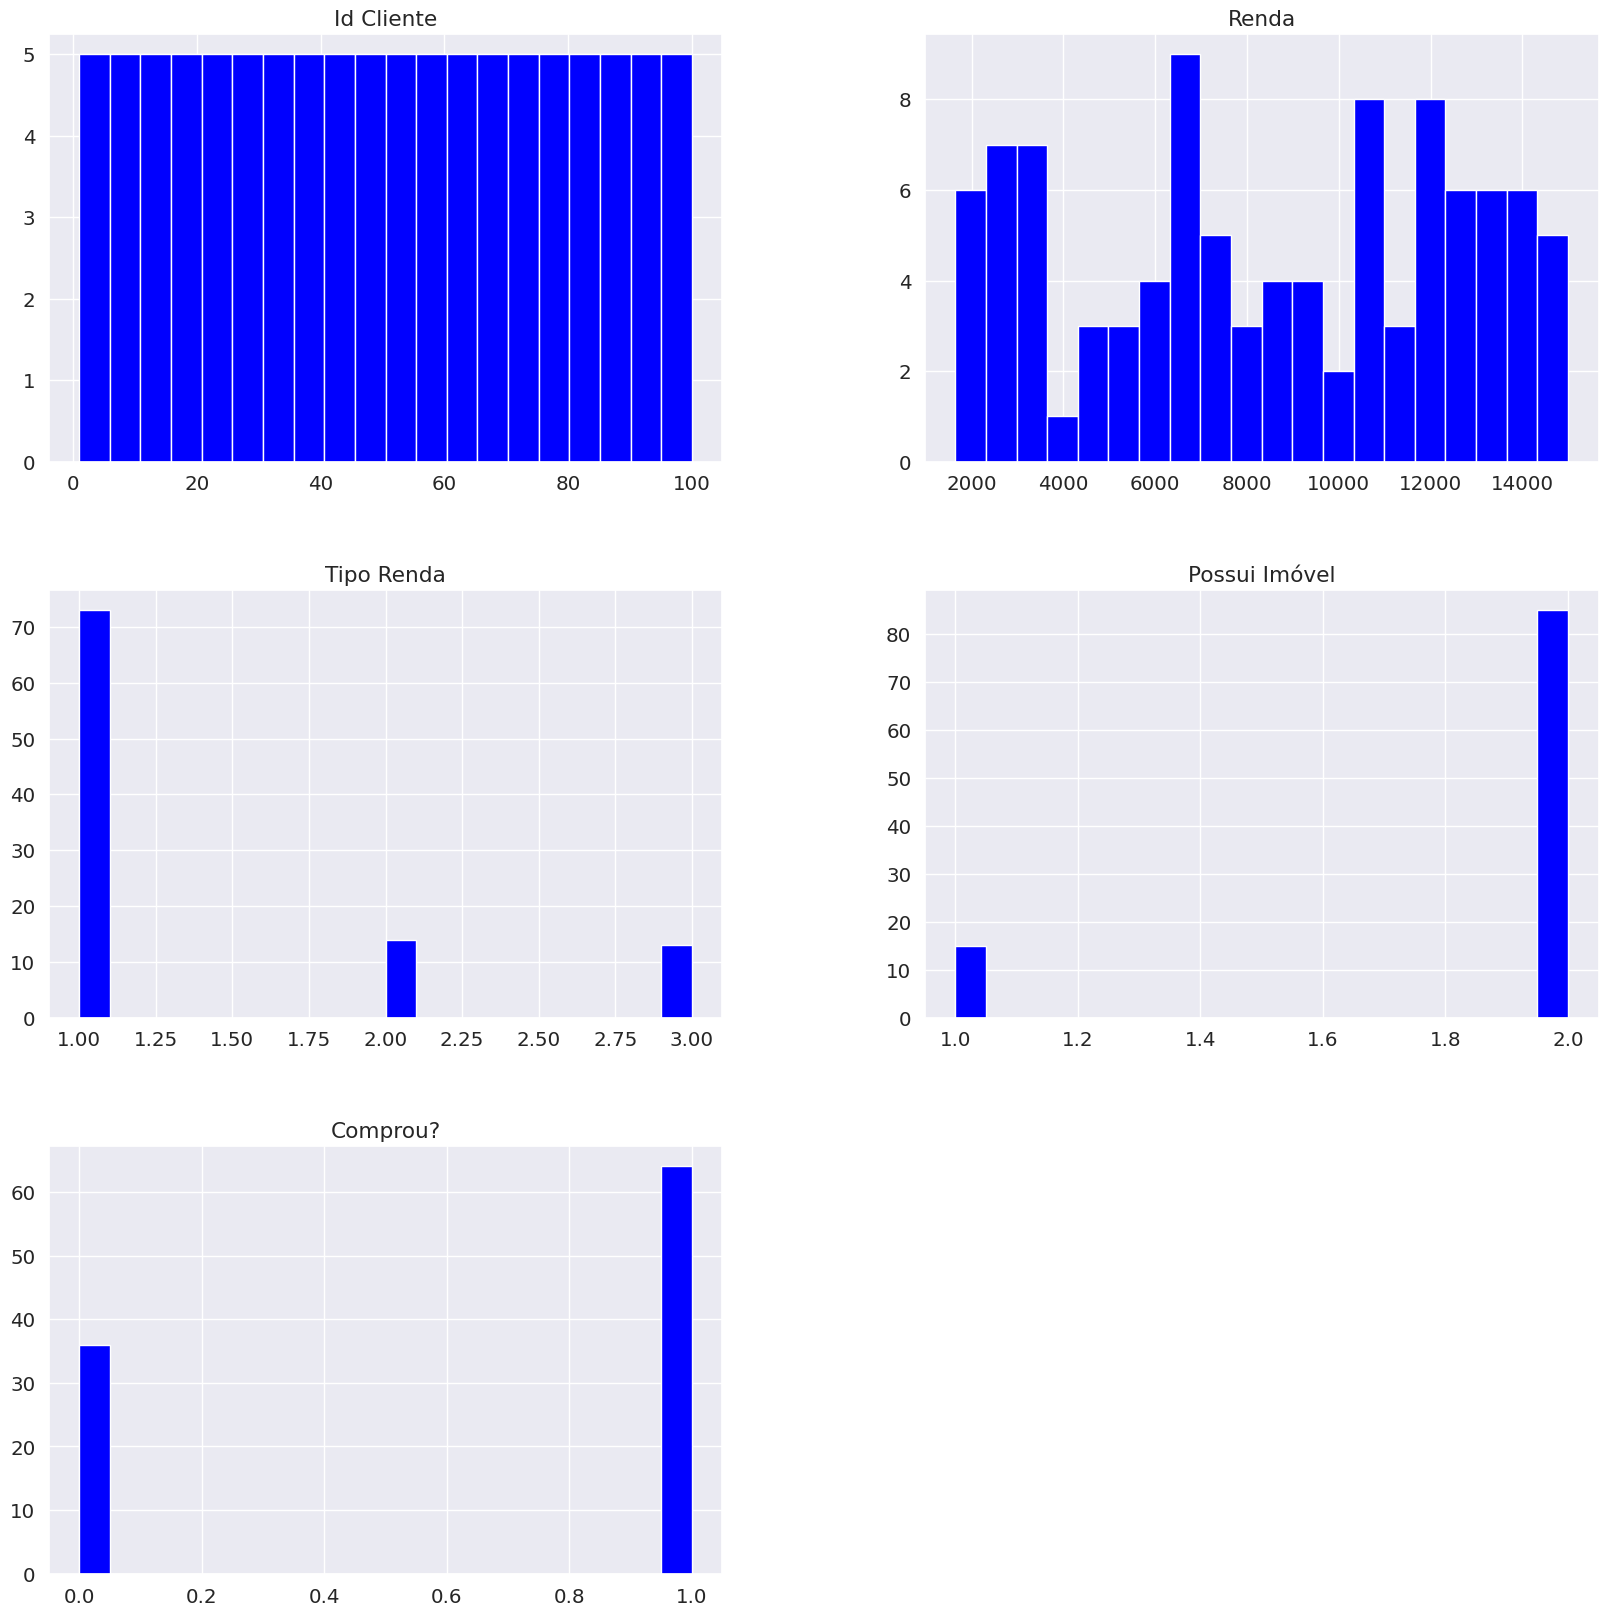

In [9]:
sns.set( font_scale=1.3, rc={ 'figure.figsize':(20,20) })
eixo = Base_Dados.hist( bins=20, color='blue')

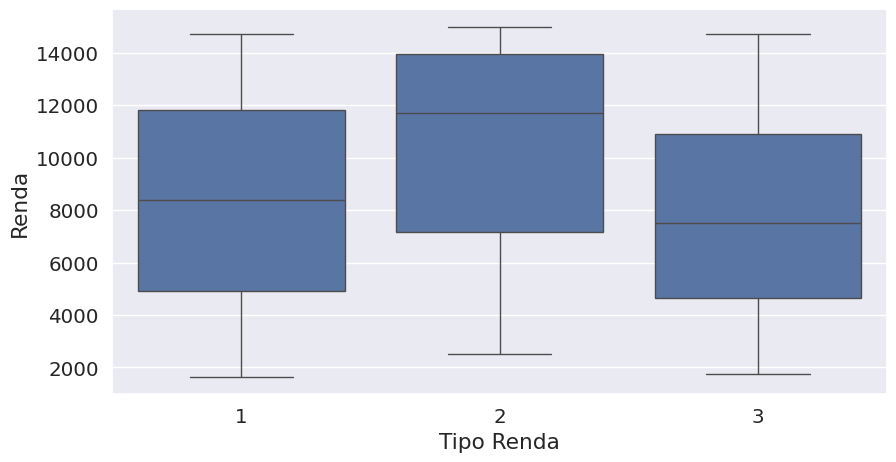

In [10]:
plt.figure( figsize=(10,5) )
sns.boxplot( data=Base_Dados, x='Tipo Renda', y='Renda' );

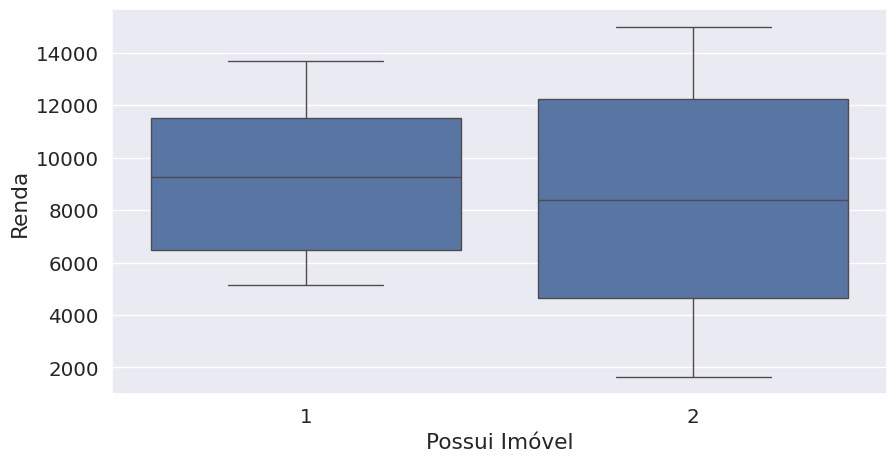

In [11]:
plt.figure( figsize=(10,5) )
sns.boxplot( data=Base_Dados, x='Possui Imóvel', y='Renda' );

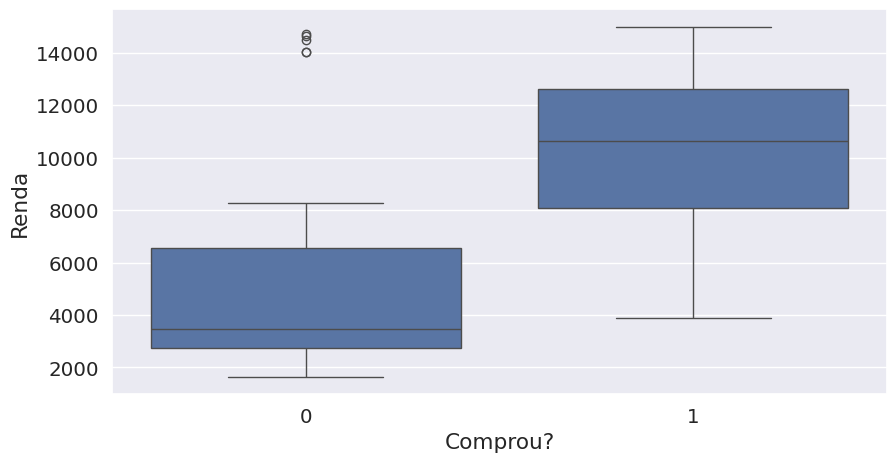

In [13]:
plt.figure( figsize=(10,5) )
sns.boxplot( data=Base_Dados, x='Comprou?', y='Renda' );

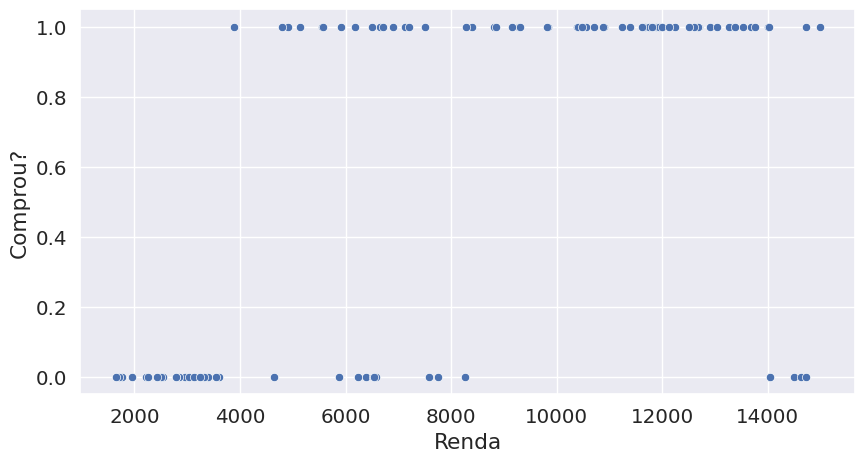

In [14]:
plt.figure( figsize=(10,5) )
sns.scatterplot( data=Base_Dados, x='Renda', y='Comprou?' );

In [15]:
Caracteristica = Base_Dados.iloc[:, 1:4].values
Previsor = Base_Dados.iloc[:,4:5].values

In [16]:
Caracteristica

array([[10480,     1,     2],
       [ 6182,     2,     2],
       [ 6387,     3,     1],
       [ 6528,     1,     2],
       [ 8269,     1,     2],
       [ 6903,     1,     2],
       [ 1947,     1,     2],
       [14008,     1,     2],
       [ 2213,     1,     2],
       [13321,     2,     2],
       [14043,     3,     2],
       [ 5561,     1,     2],
       [11890,     1,     2],
       [13308,     1,     2],
       [11666,     1,     2],
       [ 3395,     1,     2],
       [ 8854,     2,     2],
       [ 1760,     3,     2],
       [ 7761,     1,     2],
       [ 2952,     1,     2],
       [ 4904,     1,     2],
       [ 2262,     1,     2],
       [13274,     1,     2],
       [ 2546,     1,     2],
       [10393,     2,     2],
       [10901,     3,     2],
       [ 9271,     1,     1],
       [11230,     1,     1],
       [12908,     1,     1],
       [ 6543,     1,     1],
       [11742,     1,     2],
       [ 6578,     2,     2],
       [10555,     3,     1],
       [ 8

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_treino, x_teste, y_treino, y_teste = train_test_split( Caracteristica,
                                                        Previsor,
                                                         test_size=0.20)

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
Funcao_Logistica = LogisticRegression()
Funcao_Logistica.fit(x_treino, y_treino)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [24]:
Previsoes = Funcao_Logistica.predict( x_teste )

In [25]:
Previsoes

array([0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1])

In [26]:
y_teste

array([[0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1]])

In [27]:
from sklearn.metrics import confusion_matrix

confusion_matrix( y_teste, Previsoes )

array([[ 6,  0],
       [ 1, 13]])

In [29]:
from sklearn.metrics import classification_report

In [30]:
print( classification_report( y_teste, Previsoes))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.93      0.96        14

    accuracy                           0.95        20
   macro avg       0.93      0.96      0.94        20
weighted avg       0.96      0.95      0.95        20



In [43]:
# Novo cliente que chegou na tenda!

Salario = 5000
Tipo_Renda = 3
Possui_Imovel = 1

Parametro = [[Salario, Tipo_Renda, Possui_Imovel ]]

Fazendo_Previsao = Funcao_Logistica.predict( Parametro )

Probabilidade = Funcao_Logistica.predict_proba( Parametro )

if Fazendo_Previsao == 0:
  print('Não irá comprar')
  print( Probabilidade )

else:
  print('Vai comprar')
  print( Probabilidade )

Não irá comprar
[[0.66690217 0.33309783]]
